# Image Compression 

KMeans are widely used in one specific case, which is image compression. Let's test this feature a little bit.

0. Import usuals librairies

In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
import ast
from datetime import datetime
from sklearn.impute import KNNImputer

from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.cluster import KMeans

1. In Scikit Learn, import _load_sample_image_ and load “china.jpg” or “flower.jpg” picture

In [87]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

2. Via matplotlib, diplay your picture

      a. Hint : we will use _imshow_

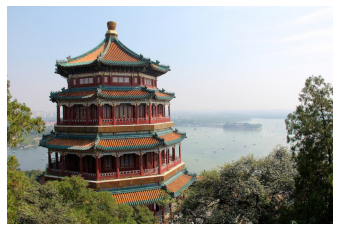

In [88]:
plt.imshow(china)
plt.axis('off')
plt.show()

  3. Look at the dataset's shape

In [89]:
china.shape

(427, 640, 3)

----> Our dataset is split between the height of the pixel, the width of the pixel and its color in RGB

4. DDivide your dataset by 255 then resize it in two dimensions (length x width, RGB). 

  a. Hint: You can use the ```.reshape()``` method.

In [90]:
china = china / 255

china = china.reshape(427 * 640, 3)


5. We will reduce the number of colours to 16. To do this create a KMeans algorithm that will take 16 clusters.


Instead of using KMeans, you can use [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html)

In [91]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=16, random_state=0).fit(china)
kmeans.fit(china)

MiniBatchKMeans(n_clusters=16, random_state=0)

6. For each of the colors present in your dataset, reassign the color code of the centroid of the corresponding cluster in a variable that we will call _new_colors_ .

In [92]:
cluster_centers = kmeans.cluster_centers_

In [93]:
new_colors = []
for n in range(len(china)):
    new_colors.append(cluster_centers[kmeans.labels_[n]])


In [94]:
new_colors = np.concatenate(new_colors, axis=0)
new_colors.shape

(819840,)

7. Resize _new_colors_ to 3 dimensions

In [95]:
#resize new_colors to the original image size
new_colors = new_colors.reshape(427, 640, 3)


8. Visualize your new image with your variable _new_colors_.

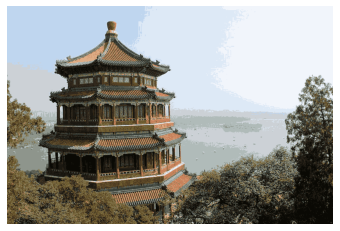

In [96]:
plt.imshow(new_colors)
plt.axis('off')
plt.show()